# Import Basic Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

# Reading Dataset

In [3]:
df = pd.read_csv("Salary_dataset.csv")

# Basic Operations

In [4]:
display(df.head())
display(df.tail())
display(df.describe())
display(df.isnull().sum())
print(df.shape)

df.drop_duplicates(inplace = True)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

(30, 3)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


# Data Cleaning and Preprocessing

In [6]:
df.drop(columns= ["Unnamed: 0"], axis = 1, inplace=True)

In [7]:
df.rename(columns={
    "YearsExperience" : "Experience"
}, inplace = True)

In [8]:
df.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization

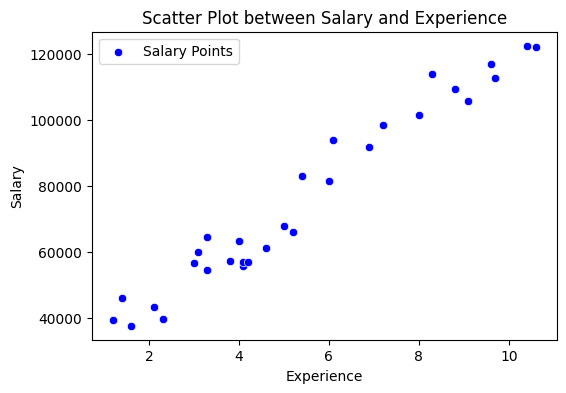

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Experience", y="Salary", color='blue', label='Salary Points')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot between Salary and Experience")
plt.legend()
plt.show()

<Figure size 600x400 with 0 Axes>

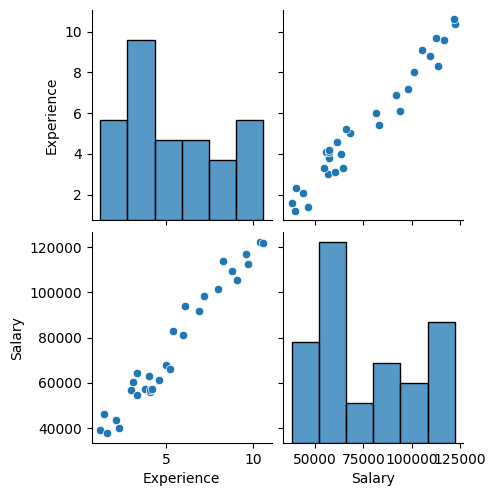

In [10]:
plt.figure(figsize=(6,4))
sns.pairplot(df)
plt.show()

# Defining Dependent and Independent Variable

In [11]:
X = df[["Experience"]]      # Independent variable (2D)
y = df["Salary"]            # Dependent variable (1D)

# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print("Train Shape of X:", X_train.shape)
print("Test Shape of X:",X_test.shape)
print("Train Shape of y:", y_train.shape)
print("Test Shape of y:",y_test.shape)

Train Shape of X: (22, 1)
Test Shape of X: (8, 1)
Train Shape of y: (22,)
Test Shape of y: (8,)


# Standardization

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression

In [15]:
regressionLR = LinearRegression()
regressionLR.fit(X_train_scaled, y_train)

print("Coefficient (Slope):", regressionLR.coef_)
print("Intercept:", regressionLR.intercept_)

y_pred_LR = regressionLR.predict(X_test_scaled)

mseLR = mean_squared_error(y_test, y_pred_LR)
maeLR = mean_absolute_error(y_test, y_pred_LR)
rmseLR = np.sqrt(mseLR)
r2LR = r2_score(y_test, y_pred_LR)

print("MSE:", mseLR)
print("MAE:", maeLR)
print("RMSE:", rmseLR)
print("R2 Score:", r2LR)

Coefficient (Slope): [25063.1519945]
Intercept: 70417.40909090909
MSE: 38802588.99247059
MAE: 5056.9954666635895
RMSE: 6229.172416338352
R2 Score: 0.9347210011126783


# Train RidgeCV Regression

In [16]:
ridgecv = RidgeCV(cv=5)  # 5-fold cross-validation
ridgecv.fit(X_train_scaled, y_train)

print("Coefficient (Slope):", ridgecv.coef_)
print("Intercept:", ridgecv.intercept_)

y_pred_RCV = ridgecv.predict(X_test_scaled)

mseRCV = mean_squared_error(y_test, y_pred_RCV)
maeRCV = mean_absolute_error(y_test, y_pred_RCV)
rmseRCV = np.sqrt(mseRCV)
r2RCV = r2_score(y_test, y_pred_RCV)

print("MSE:", mseRCV)
print("MAE:", maeRCV)
print("RMSE:", rmseRCV)
print("R2 Score:", r2RCV)

Coefficient (Slope): [24949.74406693]
Intercept: 70417.40909090909
MSE: 39137789.71500002
MAE: 5098.9164044943955
RMSE: 6256.020277700514
R2 Score: 0.9341570808135129


# Train LassoCV Regression

In [17]:
lassocv = LassoCV(cv=5)  # 5-fold cross-validation
lassocv.fit(X_train_scaled, y_train)

print("Coefficient (Slope):", lassocv.coef_)
print("Intercept:", lassocv.intercept_)

y_pred_LCV = lassocv.predict(X_test_scaled)

mseLCV = mean_squared_error(y_test, y_pred_LCV)
maeLCV = mean_absolute_error(y_test, y_pred_LCV)
rmseLCV = np.sqrt(mseLCV)
r2LCV = r2_score(y_test, y_pred_LCV)

print("MSE:", mseLCV)
print("MAE:", maeLCV)
print("RMSE:", rmseLCV)
print("R2 Score:", r2LCV)

Coefficient (Slope): [25038.08884251]
Intercept: 70417.40909090909
MSE: 38873409.228007086
MAE: 5066.259993924193
RMSE: 6234.854387073293
R2 Score: 0.9346018576689847


# Train ElasticNetCV Regression

In [18]:
elasticnetcv = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .9], max_iter=5000) # 5-fold cross-validation
elasticnetcv.fit(X_train_scaled, y_train)

print("Coefficient (Slope):", elasticnetcv.coef_)
print("Intercept:", elasticnetcv.intercept_)

y_pred_ECV = elasticnetcv.predict(X_test_scaled)

mseECV = mean_squared_error(y_test, y_pred_ECV)
maeECV = mean_absolute_error(y_test, y_pred_ECV)
rmseECV = np.sqrt(mseECV)
r2ECV = r2_score(y_test, y_pred_ECV)

print("MSE:", mseECV)
print("MAE:", maeECV)
print("RMSE:", rmseECV)
print("R2 Score:", r2ECV)

Coefficient (Slope): [6615.44180113]
Intercept: 70417.40909090909
MSE: 591170250.5936534
MAE: 19966.06114722215
RMSE: 24313.992896964774
R2 Score: 0.005452905778809081


In [19]:
def compare_models(results_dict, criterion='r2'):
    """
    Compare regression models and select the best one based on the chosen criterion.
    
    Parameters:
    - results_dict: dict
        Dictionary containing model names as keys and metric dicts as values.
        Example:
        {
            'Linear Regression': {'MSE': 123, 'MAE': 10, 'RMSE': 11.1, 'R2': 0.95},
            'RidgeCV': {'MSE': 130, 'MAE': 11, 'RMSE': 11.4, 'R2': 0.93},
        }
    - criterion: str
        Metric used for comparison. Default is 'r2'. 
        Use 'r2' for higher-is-better, or any of ['mse', 'mae', 'rmse'] for lower-is-better.
    """
    
    # Create a DataFrame for comparison
    df = pd.DataFrame(results_dict).T  # transpose for cleaner look
    
    # Decide how to select best model
    if criterion.lower() == 'r2':
        best_model = df['R2'].idxmax()
    else:
        best_model = df[criterion.upper()].idxmin()
    
    print("\nModel Comparison:\n")
    print(df.round(4))
    print("\nBest model based on", criterion.upper(), ":", best_model)
    
    return best_model, df

results = {
    'Linear Regression': {'MSE': mseLR, 'MAE': maeLR, 'RMSE': rmseLR, 'R2': r2LR},
    'RidgeCV': {'MSE': mseRCV, 'MAE': maeRCV, 'RMSE': rmseRCV, 'R2': r2RCV},
    'LassoCV': {'MSE': mseLCV, 'MAE': maeLCV, 'RMSE': rmseLCV, 'R2': r2LCV},
    'ElasticNetCV': {'MSE': mseECV, 'MAE': maeECV, 'RMSE': rmseECV, 'R2': r2ECV}
}

best_model, comparison_table = compare_models(results, criterion='r2')


Model Comparison:

                            MSE         MAE        RMSE      R2
Linear Regression  3.880259e+07   5056.9955   6229.1724  0.9347
RidgeCV            3.913779e+07   5098.9164   6256.0203  0.9342
LassoCV            3.887341e+07   5066.2600   6234.8544  0.9346
ElasticNetCV       5.911703e+08  19966.0611  24313.9929  0.0055

Best model based on R2 : Linear Regression


# Plot Best Fit Line

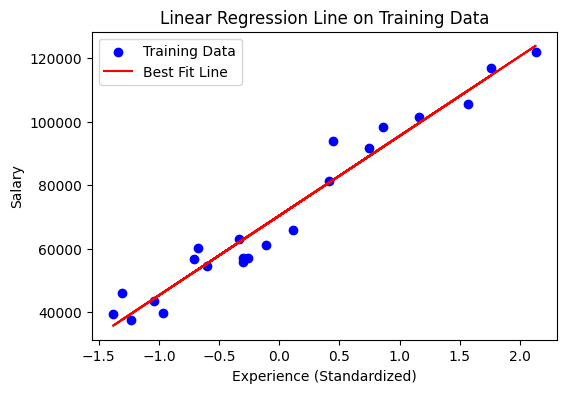

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, regressionLR.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("Linear Regression Line on Training Data")
plt.legend()
plt.show()

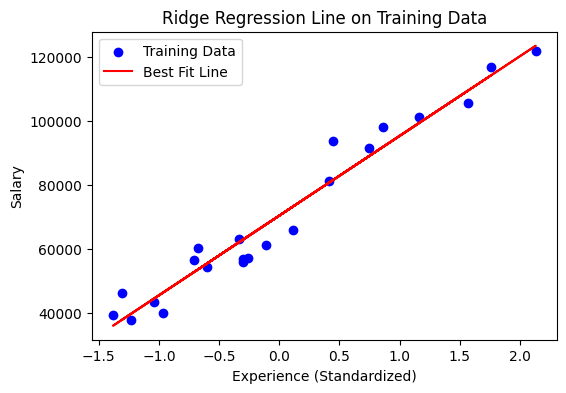

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, ridgecv.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("Ridge Regression Line on Training Data")
plt.legend()
plt.show()

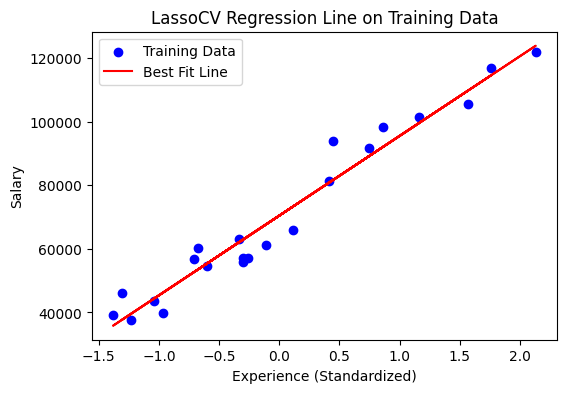

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, lassocv.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("LassoCV Regression Line on Training Data")
plt.legend()
plt.show()

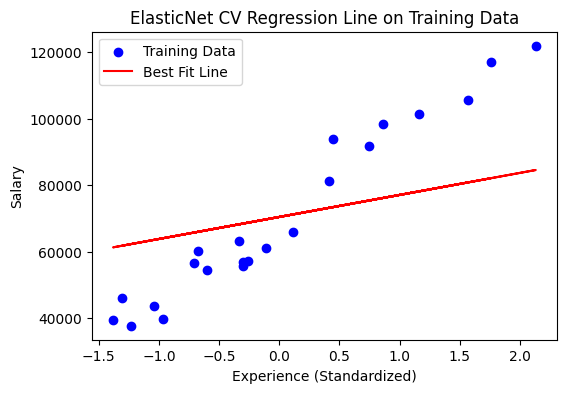

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(X_train_scaled, y_train, color='blue', label="Training Data")
plt.plot(X_train_scaled, elasticnetcv.predict(X_train_scaled), color='red', label="Best Fit Line")
plt.xlabel("Experience (Standardized)")
plt.ylabel("Salary")
plt.title("ElasticNet CV Regression Line on Training Data")
plt.legend()
plt.show()

# Prediction

In [24]:
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
prediction = regressionLR.predict(new_exp_scaled)[0]
print("Predicted Salary for 5 years of experience:", prediction)

Predicted Salary for 5 years of experience: 71397.10622651374


In [25]:
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
prediction = ridgecv.predict(new_exp_scaled)[0]
print("Predicted Salary for 5 years of experience:", prediction)

Predicted Salary for 5 years of experience: 71392.6732078006


In [26]:
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
prediction = lassocv.predict(new_exp_scaled)[0]
print("Predicted Salary for 5 years of experience:", prediction)

Predicted Salary for 5 years of experience: 71396.12652937813


In [27]:
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
prediction = elasticnetcv.predict(new_exp_scaled)[0]
print("Predicted Salary for 5 years of experience:", prediction)

Predicted Salary for 5 years of experience: 70676.0010423422
